# **HW 3: Bayes-based Classifiers and SVM**
**HW Due date is 03/11/2025, 23:59 pm**

Objective:
* To understand the basics of Naive Bayes, and SVM classifiers.
* To practice building these models using sample datasets.
* To visualize model performance and apply hyperparameter tuning techniques.

In [2]:
import pandas as pd

# Load the Cleveland Heart Disease dataset
# Replace 'path_to_your_file.data' with the actual path to your .data file
heart_df = pd.read_csv("processed-1.cleveland.data", header=None, delimiter=',')
selected_columns = [0, 1, 2, 3, 4, 13] # for now we only use first 5 attributes and target class. You might want to include other attributes to see how the accuracy of the trained models are changing!
heart_df = heart_df.iloc[:, selected_columns]
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'HD']
heart_df.columns = column_names
heart_df['HD'] = (heart_df['HD'] > 0).astype(int) #This line converts the 'HD' column into a binary attribute, where any value greater
 # than 0 is considered as presence of heart disease (1), and 0 otherwise."""

# dataset is from this link: https://archive.ics.uci.edu/dataset/45/heart+disease
#sex: sex (1 = male; 0 = female)
"""cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic"""
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
"""HD: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing"""
heart_df.head()

,age,sex,cp,trestbps,chol,HD
0,63.0,1.0,1.0,145.0,233.0,0
1,67.0,1.0,4.0,160.0,286.0,1
2,67.0,1.0,4.0,120.0,229.0,1
3,37.0,1.0,3.0,130.0,250.0,0
4,41.0,0.0,2.0,130.0,204.0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pgmpy.models import BayesianNetwork


# Splitting features and target
X = heart_df.drop(columns=['HD'])
y = heart_df['HD']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
## Your code starts here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)          #need to scale the features so different magnitudes of features dont have an effect
X_test_scaled = scaler.fit_transform(X_test)            #y train and y test arent standardized becuase theyre labels no features

## Your code ends here

Use Naive Bayes classifier to get a model.

In [4]:
from sklearn.metrics import accuracy_score


# Step 3: Initial Evaluation with Naive Bayes
## Your code starts here
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)               #train the model
y_test_pred = nb_model.predict(X_test_scaled)       #use the model to get predictions
accuracy = accuracy_score(y_test, y_test_pred)      #get accuracy by comparing predictions with actual
accuracy

## Your code ends here

0.7213114754098361

**Question:** I got an accuracy of 67.2%. What can you do to improve on that using Naive Bayes Classifier?

**Answer:** Naive Bayes assumes idependence among features. If there is dependence, using a bayesian network instead might be better.

Correlation Matrix:
               age       sex        cp  trestbps      chol        HD
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.223120
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.276816
cp        0.104139  0.010084  1.000000 -0.036077  0.072319  0.414446
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.150825
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.085164
HD        0.223120  0.276816  0.414446  0.150825  0.085164  1.000000


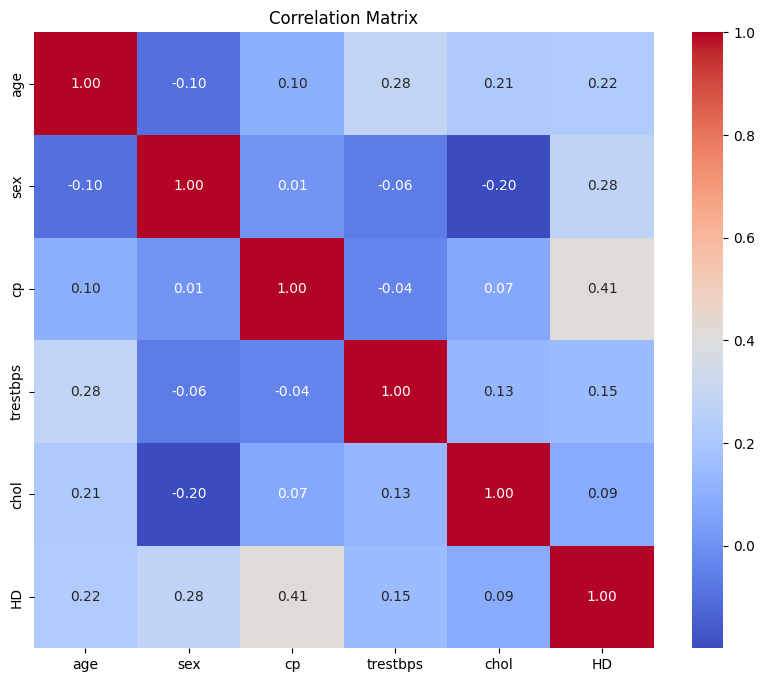

In [5]:
import pandas as pd

# Generate the correlation matrix
## Your code starts here
correlation_matrix = heart_df.corr()    #get correlation matrix to see how the features are correlated to show dependnce
## Your code ends here

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# You can also visualize the correlation matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Now, Apply SVM models to the same dataset!

In [6]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Comparison with SVM Classifiers: apply linear and a non-linear SVM classifiers
## Your code starts here
iris = load_iris()          #load iris data, commonly used for SVM
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) #split the data into traing and testing

#create the linear model, fit it and test
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
linear_pred = svm_linear.predict(X_test)
linear_svm_accuracy = accuracy_score(y_test, linear_pred)

## Your code ends here
print("Linear SVM Accuracy:", linear_svm_accuracy)

## Your code starts here
#create the nonlinear model, fit it and test
svm_nonlinear = SVC(kernel='poly')                                  
svm_nonlinear.fit(X_train, y_train)
nonlinear_pred = svm_linear.predict(X_test)
nonlinear_svm_accuracy = accuracy_score(y_test, nonlinear_pred)

## Your code ends here
print("Non-linear SVM Accuracy:", nonlinear_svm_accuracy)

# Task 3: Exploring Different Kernels
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
## Your code starts here
    #loop to create a different model for each kernel and compare their performances
    svm = SVC(kernel=kernel)                        #create many different svms with different kernel functions to compare them
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    report = classification_report(y_test, pred)
    print(kernel, "report:")
    print(report)
    print()

## Your code ends here

# Task 4: Hyperparameter Tuning : Use GridSearchCV to find the best hyperparameters and print them out
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_classifier = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_classifier, param_grid)      #model that finds the best hyperparameters, svm is also automatically refitted by
grid_search.fit(X_train, y_train)                           #the best parameters the grid search find
print("The best parameters are:", grid_search.best_params_)

## Your code ends here



Linear SVM Accuracy: 1.0
Non-linear SVM Accuracy: 1.0
poly report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


rbf report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


sigmoid report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.0

C:\Users\mattf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mattf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mattf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW3.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.